In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn import linear_model

# Leitura do dataset
O <i>dataset</i> utilizado foi retirado do site <b>Kaggle</b>, o mesmo contém os dados de avaliação, número de avaliações, títulos, descrição, número de páginas, tipo e preço de 270 livros relacionados à programação. 
<b>Fonte:</b> https://www.kaggle.com/thomaskonstantin/top-270-rated-computer-science-programing-books a escolha da base se deu pelo fato de existirem dados que podem possuir várias interpretações e estar mais relacionado com nossa área de atuação. 

In [18]:
data = pd.read_csv('prog_book.csv', header = (0)) #Leitura do dataset com extensão.csv
print("Números de linhas e colunas: ", data.shape)
data.head(25)

Números de linhas e colunas:  (271, 7)


,Rating,Reviews,Book_title,Description,Number_Of_Pages,Type,Price
0,4.17,"3,829",The Elements of Style,This style manual offers practical advice on i...,105,Hardcover,9.323529
1,4.01,"1,406","The Information: A History, a Theory, a Flood","James Gleick, the author of the best sellers C...",527,Hardcover,11.000000
2,3.33,0,Responsive Web Design Overview For Beginners,In Responsive Web Design Overview For Beginner...,50,Kindle Edition,11.267647
3,3.97,"1,658",Ghost in the Wires: My Adventures as the World...,If they were a hall of fame or shame for compu...,393,Hardcover,12.873529
4,4.06,"1,325",How Google Works,Both Eric Schmidt and Jonathan Rosenberg came ...,305,Kindle Edition,13.164706
5,3.84,117,The Meme Machine,What is a meme? First coined by Richard Dawkin...,288,Paperback,14.188235
6,4.09,"5,938",Start with Why: How Great Leaders Inspire Ever...,Why do you do what you do?\n\nWhy are some peo...,256,Hardcover,14.232353
7,4.15,"1,817",Algorithms to Live By: The Computer Science of...,A fascinating exploration of how insights from...,368,Hardcover,14.364706
8,3.87,"2,093",Weapons of Math Destruction: How Big Data Incr...,A former Wall Street quant sounds an alarm on ...,259,Hardcover,14.502941
9,4.62,0,ZX Spectrum Games Code Club: Twenty fun games ...,This book is ideal for ZX Spectrum fans and be...,128,Paperback,14.641176


# Pré-tratamento dos dados
Neste caso, executamos o processo de limpeza do <i>dataset</i> para remover dados duplicados e <b>NaN</b> a fim de deixar os dados mais trabalháveis, evitando que haja algum tipo de ruído na hora de fazer a análise.

In [4]:
data = data.replace('?', np.nan)
#data.head(25)

In [5]:
data = data.dropna()
print("Numero de linhas e colunas: ", data.shape)
#data.head(25)

Numero de linhas e colunas:  (271, 7)


In [6]:
data = data.drop_duplicates()
print("Numero de linhas e colunas: ", data.shape)
#data.head(25)

Numero de linhas e colunas:  (271, 7)


# Escolha de x e y
Levando em consideração todas as colunas, achamos interessante recolher os dados de <i>rating</i> e <i>price</i> e basear a nossa análise nessas duas colunas.

In [7]:
book_rating = data['Rating'] 
book_price = data['Price']

# Cálculo de média, variância, mediana, desvio padrão e histograma de <i>Rating</i> e <i>Price</i>.
Para os cálculos propostos, utilizamos a biblioteca numpy com as funções mean, var, median e a std. O histogramas foram criados utizando a função histogram do numpy e os <i>plots</i> foram feitos utilizando a biblioteca matplotlib.
O retorno do histograma, como descrito em aula, é um gráfico de frequência pela variável escolhida(<i>Rating</i> ou <i>Price</i>)

Variância dos Ratings:  0.08422284827276318
Média de Ratings:  4.067416974169742
Mediana de Ratings:  4.1
Desvio Padrão das Ratings:  0.29074866250397


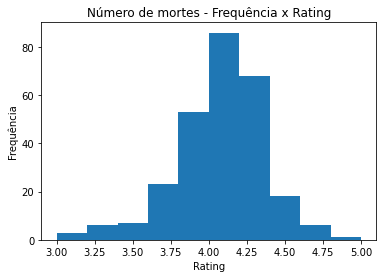

In [8]:
print('Variância dos Ratings: ', np.var(book_rating)) #Variância
print('Média de Ratings: ', np.mean(book_rating)) #Média
print('Mediana de Ratings: ', np.median(book_rating)) # Mediana
print('Desvio Padrão das Ratings: ', np.std(book_rating, ddof = 1)) #Desvio Padrão

histogram = np.histogram(book_rating, bins = 'auto') # histograma
plt.hist(book_rating)
plt.title("Número de mortes - Frequência x Rating")
plt.ylabel("Frequência")
plt.xlabel("Rating")
plt.show() #chama o plot do gráfico

Variância dos Preços:  1270.6041947413757
Média dos Preços:  54.54186021247969
Mediana dos Preços:  46.31764706
Desvio Padrão dos Preços:  35.71148465414706


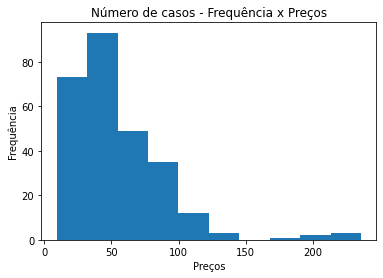

In [9]:
print('Variância dos Preços: ', np.var(book_price))
print('Média dos Preços: ', np.mean(book_price))
print('Mediana dos Preços: ', np.median(book_price))
print('Desvio Padrão dos Preços: ', np.std(book_price, ddof = 1))

histogram = np.histogram(book_price, bins = 'auto')
plt.hist(book_price)
plt.title("Número de casos - Frequência x Preços")
plt.ylabel("Frequência")
plt.xlabel("Preços")
plt.show()

# Cálculo da correlação entre a variável <i>Rating</i> e <i>Price</i> 
Os cálculos foram feitos utilizando a correlação de pearson, por meio da função pearsonr da biblioteca scipy.stats.
O resultado mostra uma correlação positiva, indicando que as duas variáveis crescem na mesma direção, entretanto esse coeficiente é muito baixo, entre -0.1 e 0.1 portanto por convenção vamos levar em consideração que essas váriaveis não possuem uma relação linear. O que pode influenciar positivamente no desempenho do modelo de regressão linear, visto que variáveis com uma relação muito forte podem interferir negativamente em alguns modelos.

In [29]:
tam = len(book_rating)  #tamanho das colunas

corr, p_value = pearsonr(book_rating, book_price) # calcula a correlação
corr = int(corr*tam)/tam

print("Correlação de Pearson: %.3f" %corr)

Correlação de Pearson: 0.044


# Passagem de dados para o dataframe
Aqui utilizamos o dataframe da biblioteca pandas para armazenar de maneira "unida" x e y a fim de passar os valores para a regressão linear.

In [31]:
dataframe = pd.DataFrame()
dataframe['x'] = book_rating  # tamanho da celula
dataframe['y'] = book_price # forma da celula
x_values = dataframe[['x']]
y_values = dataframe[['y']]

# Criação do modelo de regressão linear
Aqui utilizamos a função linear_model da biblioteca sklearn para gerar nosso modelo. Pode se notar que a linha de tendência tem uma inclinação muito baixa, o que comprova a correlação neutra das variáveis <i>Price</i> e <i>Rating</i>. A equação da regressão linear nos permite achar a o <i>Price</i> aproximado de um livro com determinado <i>Rating</i> apenas trocando o x da equação pelo próprio <i>Rating</i>

In [36]:
#Modelo de regressão linear
model = linear_model.LinearRegression()
model.fit(x_values, y_values)

#imprimindo os valores
print('Utilizando biblioteca scikit-learn no python')
print('y = ax + b')
a = model.coef_[0][0]
b = model.intercept_[0]
print('a = %.2f = Coeficiente angular - inclinação da linha de tendência' % a)
print('b = %.2f = O ponto de interceptação do eixo y.' % b)
print()
print('Equação da regressão linear:')
print('y = {}x + {}'.format(a, b))

Utilizando biblioteca scikit-learn no python
y = ax + b
a = 5.74 = Coeficiente angular - inclinação da linha de tendência
b = 31.21 = O ponto de interceptação do eixo y.

Equação da regressão linear:
y = 5.735650876049977x + 31.21257648132248


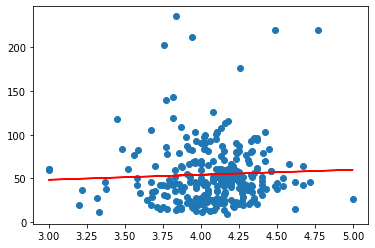

In [37]:
#Gráfico da regressão linear
y_pred = model.predict(x_values)
plt.scatter(x_values, y_values)
plt.plot(x_values, y_pred, color='red')
plt.show()